In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

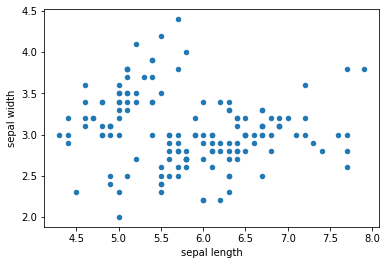

In [19]:
#question -1
df.plot.scatter('sepal length', 'sepal width');

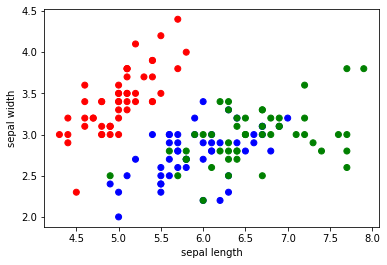

In [20]:
#question -2
colors = {'Iris-setosa':'red', 'Iris-virginica':'green', 'Iris-versicolor':'blue'}

fig, ax = plt.subplots()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
ax.scatter(df['sepal length'], df['sepal width'], c=df['class'].map(colors))

In [21]:
#question -3.1 (the scatterplot is shown below the note box marked with '#question -3.2')
def showClusterCenters(centers):
    fig = plt.figure()
    ax1 = fig.add_subplot(111) 
    colors = {'Iris-setosa':'red', 'Iris-virginica':'green', 'Iris-versicolor':'blue'}  
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    ax1.scatter(centers[:, 0], centers[:, 1], marker="s",c='black', s=100, label='Initial Cluster Centers')
    ax1.scatter(df['sepal length'], df['sepal width'], c=df['class'].map(colors), label='Classes')
    plt.legend(loc='upper left');
    plt.show()

In [22]:
def initializeRandomCenters (X):
    centers = np.zeros((K, numberOfFeatures))
    for k in range(K):
        '''choosing a random center: '''
        center = X[np.random.choice(range(numberOfExamples))]
        centers[k] = center
    showClusterCenters(centers)
    return centers

In [23]:
'''we're going to go through each point and check which is the closest centroid
     then assign that point to that color of the closest centroid. 
        this way, we're going to get the clusters '''
def createClusters(X, centers):
    '''each array inside this large array is going to be associated to a specific cluster
    let's assume that K = 2. then the array will be [[points closest to first center],
    [points cloeset to second center]] '''
    clusters = [[] for _ in range (K)] 
        
    for pointIndex, point in enumerate(X): 
        '''looping through the each point in dataset   
        which is the closest center to the data point '''
            
        closestCenter =  np.argmin(np.sqrt(np.sum((point-centers)**2, axis = 1))) #gives index of the closest center
        clusters[closestCenter].append(pointIndex)
    return clusters

In [24]:
#question -4.1 (the scatterplot is shown below the note box marked with '#question -4.2')
def showFinalClusterCenters(finalcenters, X, y):
    fig = plt.figure()
    ax1 = fig.add_subplot(111) 
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    colors = {'Iris-setosa':'red', 'Iris-virginica':'green', 'Iris-versicolor':'blue'}  
    ax1.scatter(finalcenters[:, 0], finalcenters[:, 1], marker="s",c='black', s=100, label='Final Cluster Centers')
    ax1.scatter( X[:,0], X[:,1], c=y, s = 40, cmap = plt.cm.Spectral, label=' Final Clusters')
    plt.legend(loc='upper left');
    plt.show()
    
    
   
    

In [25]:
'''after getting the clusters, we're going to calculate the new centers
    we're doing this by taking the average of that cluster and that's the new
    center point '''
def calculateNewCentroids(clusters, X):
    centers = np.zeros((K, numberOfFeatures))
    for index, cluster in enumerate(clusters):
        newCenter = np.mean(X[cluster], axis = 0)
        centers[index] = newCenter #updating the center location
    return centers

In [26]:
def predictCluster (clusters, X):
    yPrediction = np.zeros(numberOfExamples)
        
    for clusterIndex, cluster in enumerate(clusters):
        for sampleIndex in cluster: #going through each point in the cluster
                yPrediction[sampleIndex] = clusterIndex
    return yPrediction

In [27]:
#question -5.1 
'''the scatterplots are shown below the note box marked with '#question -5.2' and the explanation is on the box marked with
'#question -5.3'''
def showQuestion5 (finalcenters, X, y):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15.0, 6.0))
    colors = {'Iris-setosa':'red', 'Iris-virginica':'green', 'Iris-versicolor':'blue'}  
    axes[0].scatter(finalcenters[:, 0], finalcenters[:, 1], marker="s",c='black', s=100)
    axes[0].scatter( X[:,0], X[:,1], c=y, s = 40, cmap = plt.cm.Spectral)
    axes[1].scatter(df['sepal length'], df['sepal width'], c=df['class'].map(colors))
    axes[0].set_xlabel("sepal length")
    axes[0].set_ylabel("sepal width")
    axes[1].set_xlabel("sepal length")
    axes[1].set_ylabel("sepal width")
    plt.show()
    

In [28]:
def fit(X):
    centers = initializeRandomCenters(X)
        
    for iterations in range (maxIterations):
        clusters = createClusters(X, centers)
            
        previousCenters = centers
        centers = calculateNewCentroids(clusters, X)
        different = centers - previousCenters
            
        if not different.any():
            break
                
    yPrediction = predictCluster(clusters, X)
    showFinalClusterCenters(centers, X, yPrediction)
    showQuestion5(centers, X, yPrediction )
        
    return yPrediction

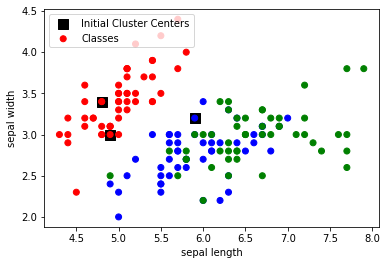

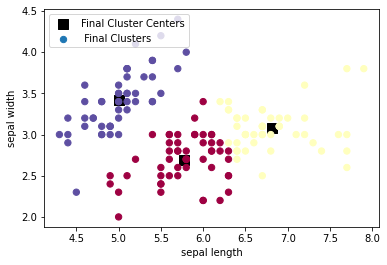

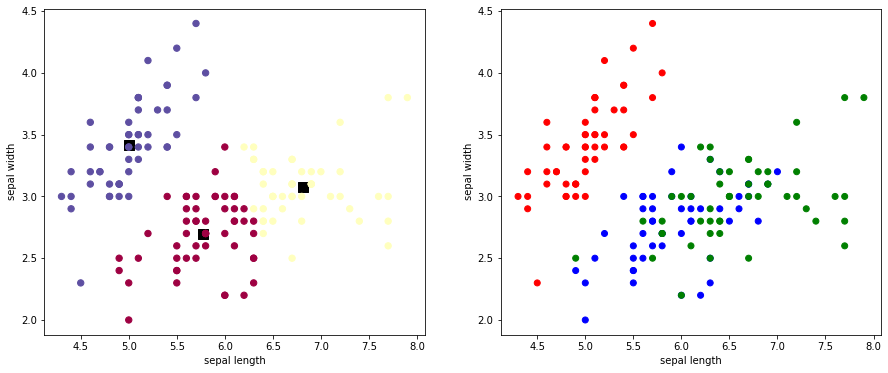

In [32]:
K = 3 #numberofclusters 
maxIterations = 999999999999999999999999999999
newdf = df[['sepal length', 'sepal width']].to_numpy()
X = newdf
numberOfExamples = X.shape[0]
numberOfFeatures = X.shape[1]
plot_figure = True

yPrediction = fit(X)


#question -3.2
#question -4.2
#question -5.2

In [31]:
#question -5.3
'''
plots are almost the same except the green dots spread amongst the red and blue dots on the right plot are counted as
of other classes' on the left plot when the algorithm is implemented. Hereby, we can conclude that
though the algorithm doesn't always work properly, it can be used for a rough clustering of the data.
'''

"\nplots are almost the same except the green dots spread amongst the red and blue dots on the right plot are counted as\nof other classes' on the left plot when the algorithm is implemented. Hereby, we can conclude that\nthough the algorithm doesn't always work properly, it can be used for a rough clustering of the data.\n"